# WeatherPy
----

# Probelm Definition:

A. Create a series of scatter plots to showcase the following relationships and explain the analysis:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude
 

B. Run linear regression separatly for Northern (>= 0 degrees latitude) & Southern (< 0 degrees latitude) Hemispheres : 

* Northern Hemisphere - Temp (F) ~ Latitude, Humidity (%) ~ Latitude, Cloudiness (%) ~ Latitude, Wind Speed (mph) ~ Latitude
* Southern Hemisphere - Temp (F) ~ Latitude, Humidity (%) ~ Latitude, Cloudiness (%) ~ Latitude, Wind Speed (mph) ~ Latitude

C. Explain what the linear regression is modeling such as any relationships is noticed and any other analysis. 

Notes:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.


# Part  A

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import datetime
from scipy.stats import linregress
import scipy.stats as st
import os
 
# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output Files 
file_path = os.path.join("..","output_data")
output_log_file = os.path.join("..","output_data","weatherAPI_log.txt")
output_data_file_all = os.path.join("..","output_data","cities_data_all.csv")
output_data_file_500 = os.path.join("..","output_data","cities_data_500.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [109]:
#Check if weather_key is loaded successfully from environment variable
if len(weather_api_key)>0:
    print("Weather API key loaded successfully")
else:
    print("Please check if API key is set into environment variable before executing the rest of the code")

Weather API key loaded successfully


## Generate Cities List

In [110]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print("Number of cities in consideration: ",len(cities))

Number of cities in consideration:  611


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [111]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Get todays date
current_date =datetime.date.today().strftime("%m/%d/%Y")

In [112]:
# Get latitude and temperature for cities and set up lists to hold reponse info

#initialize all lists to be populated from Wearther API call
city=[]
country=[]
date=[]
humidity=[]
cloudiness=[]
lat = []
lng=[]
temp = []
wind_speed=[]
city_exception=[]
icounter=0
isetCounter=1
bfound=True

#Open text file to log API call result
print_log = open(output_log_file, 'w')

print("Beginning Data Retrieval")
print("-"*30)

#Write into log file
print_log.write("Beginning Data Retrieval\n")
print_log.write("--------------------------------------------------------------\n")

# Loop through the list of cities and perform a request for data on each
for i in range(0,len(cities)):
    icity= cities[i]
    response = requests.get(query_url + icity).json()
  
    #Get all required info in the list
    try:
        #If City Latitude isnot found means reponse was not returned for the city or city was not found.
        lat.append(response['coord']['lat'])
        
        try:
            temp.append(response['main']['temp_max'])
        except:
            temp.append("")
        try:
            country.append(response['sys']['country'])
        except:
            country.append("")
        try:
            date.append(response['dt'])
        except:
            date.append("")
        try:
            humidity.append(response['main']['humidity'])
        except:
            humidity.append("")
        try:
            cloudiness.append(response['clouds']['all'])
        except:
            cloudiness.append("")
        try:
            lng.append(response['coord']['lon'])
        except:
            lng.append("")
        try:
            wind_speed.append(response['wind']['speed'])
        except:
            wind_speed.append("")
  
        city.append(icity)
        bfound=True

    except:
        #Exception of city not found. Add these cities in the list in case we need them
        print("City not found. Skipping...")
        city_exception.append(city)
        bfound = False
        
        #Write into log file
        print_log.write("City not found. Skipping...\n")
        
        continue
    
    finally:
        icounter=icounter+1

        if bfound==True:
                print(f"Processing Record {(icounter)} of Set {isetCounter} | {icity}")   
                
                #Write into log file
                print_log.write(f"Processing Record {(icounter)} of Set {isetCounter} | {icity}\n")
 
        if icounter==50:
            isetCounter+=1
            icounter=0
            
#Print Final block
print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

#Write into log file
print_log.write("--------------------------------------------------------------\n")
print_log.write("Data Retrieval Complete\n")
print_log.write("--------------------------------------------------------------")

#Close file
print_log.close()

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | rio cuarto
City not found. Skipping...
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | parsabad
Processing Record 7 of Set 1 | hofn
Processing Record 8 of Set 1 | kutum
Processing Record 9 of Set 1 | soldotna
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | haines junction
Processing Record 13 of Set 1 | clovis
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | salalah
Processing Record 17 of Set 1 | noumea
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | beloha
Processing Record 20 of Set 1 | chepareria
Processing Record 21 of Set 1 | emerald
Processing Record 22 of Set 1 | pangnirtung
Processing Record 23 of Set 1 | piacenza
Processing Record 24 of Set 1 | poc

Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | severo-kurilsk
Processing Record 8 of Set 5 | tacuarembo
Processing Record 9 of Set 5 | makubetsu
Processing Record 10 of Set 5 | sitka
Processing Record 11 of Set 5 | alice springs
Processing Record 12 of Set 5 | cidreira
Processing Record 13 of Set 5 | hami
Processing Record 14 of Set 5 | kupang
City not found. Skipping...
Processing Record 16 of Set 5 | ingham
Processing Record 17 of Set 5 | ishikari
City not found. Skipping...
Processing Record 19 of Set 5 | jiayuguan
Processing Record 20 of Set 5 | yumen
Processing Record 21 of Set 5 | patacamaya
City not found. Skipping...
Processing Record 23 of Set 5 | lompoc
Processing Record 24 of Set 5 | yasnyy
Processing Record 25 of Set 5 | kaitangata
Processing Record 26 of Set 5 | umm lajj
Processing Record 27 of Set 5 | riyadh
Processing Record 28 of Set 5 | oakdale
Processing Record 29 of Set 5 | narsaq
Processing Record 30 of Set 5 | port blair
Processing Record

Processing Record 15 of Set 9 | vaitape
Processing Record 16 of Set 9 | alamos
Processing Record 17 of Set 9 | alihe
Processing Record 18 of Set 9 | cachoeiras de macacu
Processing Record 19 of Set 9 | varna
Processing Record 20 of Set 9 | hambantota
Processing Record 21 of Set 9 | krasnovishersk
Processing Record 22 of Set 9 | avesta
Processing Record 23 of Set 9 | kingaroy
Processing Record 24 of Set 9 | garlasco
Processing Record 25 of Set 9 | zaranj
City not found. Skipping...
Processing Record 27 of Set 9 | isla mujeres
Processing Record 28 of Set 9 | saint-louis
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of Set 9 | halifax
Processing Record 32 of Set 9 | sur
Processing Record 33 of Set 9 | purpe
Processing Record 34 of Set 9 | half moon bay
Processing Record 35 of Set 9 | masvingo
Processing Record 36 of Set 9 | leshukonskoye
Processing Record 37 of Set 9 | dakar
Processing Record 38 of Set 9 | beni
Processing Record 39 of Set 9 | mezen
Processin

In [113]:
#Check if data is captured correctly
print("Total input City count:", len(cities))
print("City count:", len(city))
print("Country count:", len(country))
print("Date count:", len(date))
print("Cloudiness count:", len(cloudiness))
print("Latitude count:", len(lat))
print("Longitude count:", len(lng))
print("Humidity count:", len(humidity))
print("Max Temp count:", len(temp))
print("Wind Speed count:", len(wind_speed))
print("Cities count that did not find the weather forecast:", len(city_exception))

Total input City count: 611
City count: 551
Country count: 551
Date count: 551
Cloudiness count: 551
Latitude count: 551
Longitude count: 551
Humidity count: 551
Max Temp count: 551
Wind Speed count: 551
Cities count that did not find the weather forecast: 60


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
#Create a dictionary of column values from the lists
dict = {"City":city, "Country":country,"Date":date,"Cloudiness":cloudiness,"Humidity":humidity,
        "Latitude":lat,"Longitude":lng,"Max Temp":temp,"Wind Speed":wind_speed} 

#Create Data Frame
city_weather_data = pd.DataFrame(dict)

In [115]:
#Check for null values 
city_weather_data[city_weather_data.isnull()].count()

City          0
Country       0
Date          0
Cloudiness    0
Humidity      0
Latitude      0
Longitude     0
Max Temp      0
Wind Speed    0
dtype: int64

In [116]:
#Export all valid city data
city_weather_data.to_csv(output_data_file_all)

In [117]:
#Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
#Step 1: Get unquie rows the dataset - for the city, all other values should be same as its pulled with a same call
city_weather_data = city_weather_data.drop_duplicates()

In [118]:
#Check if any duplicate cities were found 
city_weather_data.shape

(551, 9)

In [119]:
#Step 2: Pick 500 random cities
city_weather_data = city_weather_data.sample(n = 500)

In [120]:
#Check if we have now 500 random cities to work with
city_weather_data.shape

(500, 9)

In [121]:
#Display Data Frame
city_weather_data.head()

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
273,shimoda,JP,1586640670,75,87,34.67,138.95,51.01,3.36
540,leningradskiy,RU,1586640700,94,87,69.38,178.42,12.81,3.98
473,opotiki,NZ,1586641000,32,93,-38.08,177.28,55.00,3.00
123,merauke,ID,1586640971,73,89,-8.47,140.33,77.41,7.54
325,ulety,RU,1586640987,0,46,51.36,112.48,39.42,3.29


In [122]:
#Export data to CSV file - Note only 500 city data is exported as per instruction
city_weather_data.to_csv(output_data_file_500)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

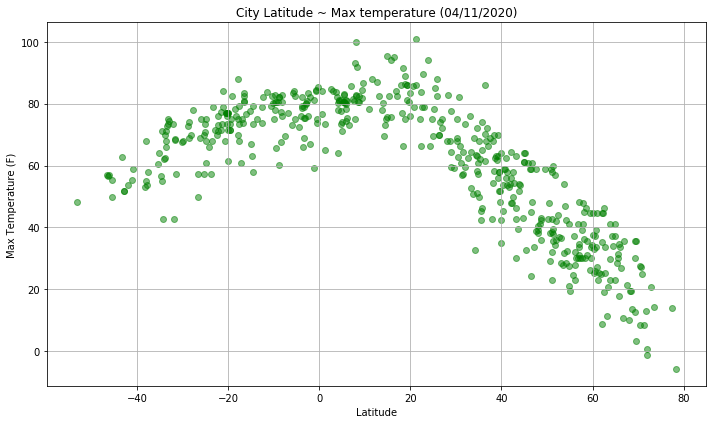

In [123]:
#Get x and y axis data
x_values =city_weather_data["Latitude"]
y_values =city_weather_data["Max Temp"]
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='green', marker='o',norm=0.05, alpha=0.50)
plt.title(f"City Latitude ~ Max temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.tight_layout()
plt.savefig('..\output_data\Lat_Temp.png')
plt.show()


##### Analysis:
* There is a good linear relation between the Temp and Latitude within the South and North hemisphere though at different rate. 
* If we move towards north (from 0 degree to a latitude of 80), there is linear decrease in temperature close to -20 degree F at around 80 degrees latitude. 
* However, data does not show the rate of temperature drop as we move towards south (from 0 degrees to around -60 degrees latitude).
* There are less # of cities (at least in the provided data) on the South hemisphere ~ North hemisphere

#### Latitude vs. Humidity Plot

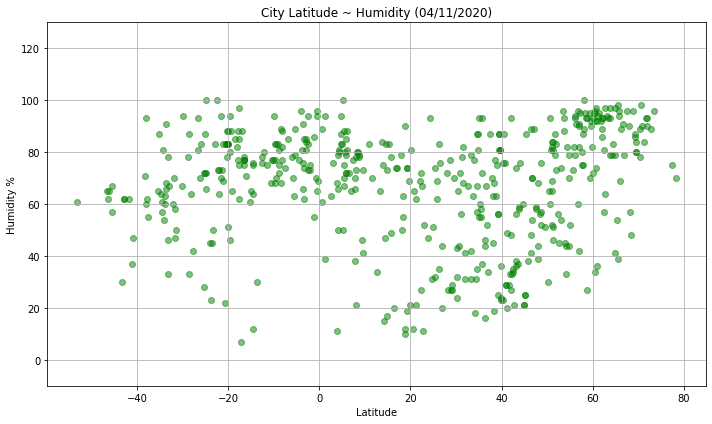

In [124]:
#Get x and y axis data
x_values =city_weather_data["Latitude"]
y_values =city_weather_data["Humidity"]
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='green', marker='o',norm=0.05, alpha=0.50)

plt.title(f"City Latitude ~ Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.ylim(-10,130)
plt.grid(True)
plt.tight_layout()
plt.savefig('..\output_data\Lat_Hum.png')
plt.show()

##### Analysis:
* There seems to be no coorlation between Latitude ~ Humidity. 
* This is much scattered data though data point shows that there are more cities above 60% humidty. 

#### Latitude vs. Cloudiness Plot

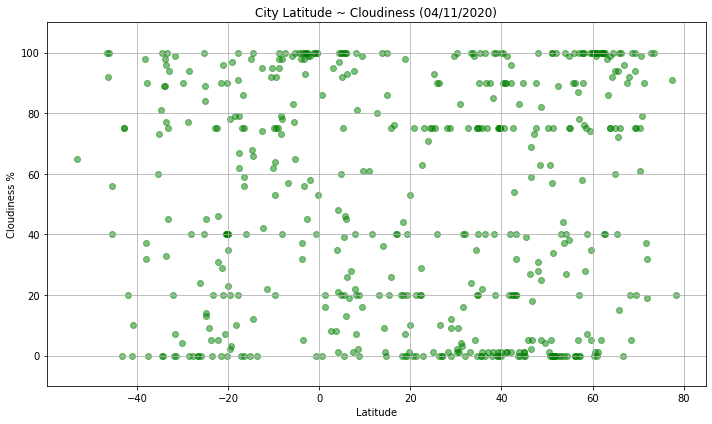

In [125]:
#Get x and y axis data
x_values =city_weather_data["Latitude"]
y_values =city_weather_data["Cloudiness"]
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='green', marker='o',norm=0.05, alpha=0.50)

plt.title(f"City Latitude ~ Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.ylim(-10,110)
plt.grid(True)
plt.tight_layout()
plt.savefig('..\output_data\Lat_Cloud.png')
plt.show()

##### Analysis:
* Data point shows that there is no coorlation between Latitude and Cloudiness.
* Data is very scattered though there are more data points above 60% cloudiness and Latitudemore than 40 degree.

#### Latitude vs. Wind Speed Plot

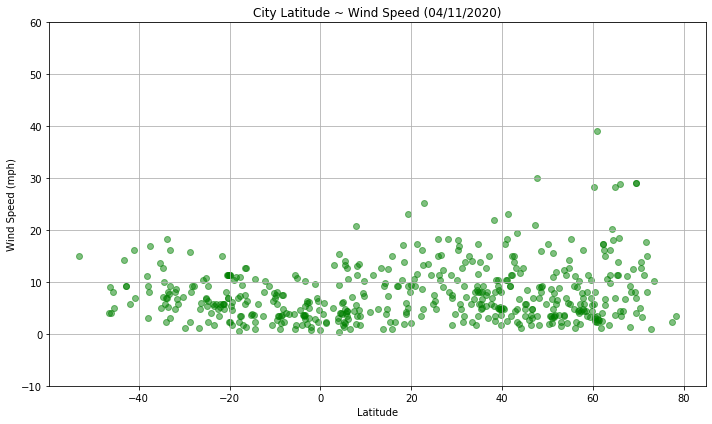

In [126]:
#Get x and y axis data
x_values =city_weather_data["Latitude"]
y_values =city_weather_data["Wind Speed"]
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='green', marker='o',norm=0.05, alpha=0.50)

plt.title(f"City Latitude ~ Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-10,60)
plt.grid(True)
plt.tight_layout()
plt.savefig('..\output_data\Lat_WindSpeed.png')
plt.show()

##### Analysis:
* Data points suggests that there is no coorelation between Latitude and Wind Speed.
* Data points shows there are majority of data points between 0 and 20mph 

# Part B

## Linear Regression Scatterplots for the Northern and Southern Hemispheres

In [127]:
# Create Northern and Southern Hemisphere DataFrames
#Northern Hemisphere (greater than or equal to 0 degrees latitude) 
#Southern Hemisphere (less than 0 degrees latitude)
north_filter=city_weather_data["Latitude"].astype(int) >=0
south_filter=city_weather_data["Latitude"].astype(int) <0

In [128]:
#Northern Hemisphere DataFrame
north_hemisphere=city_weather_data[north_filter]
north_hemisphere.head()

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
273,shimoda,JP,1586640670,75,87,34.67,138.95,51.01,3.36
540,leningradskiy,RU,1586640700,94,87,69.38,178.42,12.81,3.98
325,ulety,RU,1586640987,0,46,51.36,112.48,39.42,3.29
214,khatanga,RU,1586640675,32,93,71.97,102.50,-1.05,8.01
69,hilo,US,1586640557,1,69,19.73,-155.09,80.60,8.05


In [129]:
#Southern Hemisphere DataFrame
south_hemisphere=city_weather_data[south_filter]
south_hemisphere.head()

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
473,opotiki,NZ,1586641000,32,93,-38.08,177.28,55.00,3.00
123,merauke,ID,1586640971,73,89,-8.47,140.33,77.41,7.54
149,polewali,ID,1586640972,100,74,-3.43,119.34,75.24,2.86
48,pringsewu,ID,1586640965,65,89,-5.36,104.97,74.89,1.74
34,mar del plata,AR,1586640575,37,60,-38.00,-57.56,68.00,9.17


In [130]:
# OPTIONAL: Create a function to create Linear Regression plots

#Keeping all labels optional and if not passed, will be defaulted to blank
#Keeping standard fig size so all graphs are displayed consitantly of same size
def linear_Regression(x_values,y_values,x_label="",y_label="",title=""):

    #Linear regression equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #Linear regression equation
    regress_values = x_values * slope + intercept

    #Correleation calculation
    correlation =st.pearsonr(x_values,y_values)
    
    #y line position
    x= max(x_values)
    y= max(y_values)
    
    if len(title)==0:
        title="Scatter_Plot_"+str(current_date)
        image_name=title+".png"
    else:
        image_name=title+".png"
        title+=" ("+str(current_date)+")"
        
   
    #Adjust x, y coordinate for y-line  
    if x<0:
        x=x-50
        y=y-10 
    else:
        x=x-20
        y=y-10 
    
    y_line_pos=(x,y)

    #Plot settings
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.scatter(x_values,y_values,color='green', marker='o',norm=0.05, alpha=0.50)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,y_line_pos,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
 
    plt.grid(True)
    
    #Save graph file
    plt.savefig(file_path + "\\" + image_name)
    plt.show()
    plt.tight_layout()

    print("-"*20,"Summary of Linear Regression","-"*20)
    print("Liner equation: ",line_eq)
    print(f"The r value is: {rvalue}")
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The correlation factor between {x_label} and {y_label} is: {round(correlation[0],2)}") 
    print(f"Slope value for the linear equation between {x_label} and {y_label} is: {round(slope,2)}") 
    print(f"Standard Error value between {x_label} and {y_label} is: {round(stderr,2)}") 
    print("-"*70)

#### Information used for regression analysis:
* R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
* R is the correlation between the predicted values and the observed values of Y. 
* R2 is the square of this coefficient and indicates % of variation explained by the regression line out of the total variation. 
* R This value tends to increase as you include additional predictors in the model.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

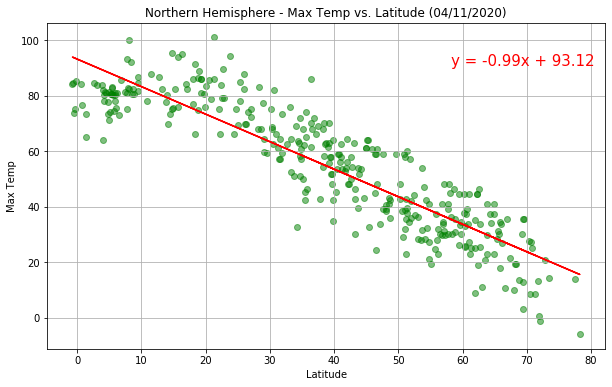

-------------------- Summary of Linear Regression --------------------
Liner equation:  y = -0.99x + 93.12
The r value is: -0.8942788419433634
The r-squared value is: 0.7997346471475631
The correlation factor between Latitude and Max Temp is: -0.89
Slope value for the linear equation between Latitude and Max Temp is: -0.99
Standard Error value between Latitude and Max Temp is: 0.03
----------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [131]:
#Prep axis and labels
x_values=north_hemisphere["Latitude"]
y_values=north_hemisphere["Max Temp"]
x_label="Latitude"
y_label="Max Temp"
title="Northern Hemisphere - Max Temp vs. Latitude"

#Call linear regression function to generate plot
linear_Regression(x_values,y_values,x_label,y_label,title)

##### Analysis:
* Scatterplot with linear regression has correlation factor of -0.89 between Latitude and Max Temp. This shows there is a strong negative linear relationship between Latitude and Max Temp.
* Scatterplot with linear regression has r-squared value of 0.79. This means 79% of the variance is explained by this linear model.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

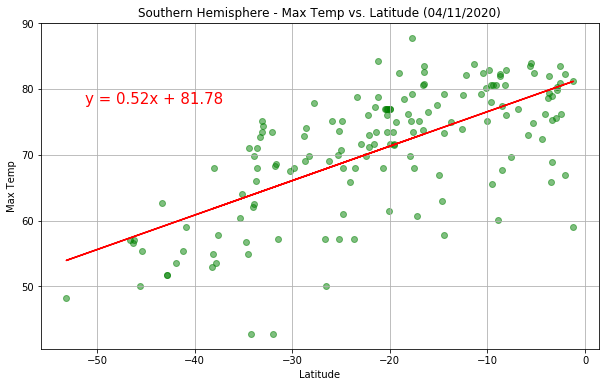

-------------------- Summary of Linear Regression --------------------
Liner equation:  y = 0.52x + 81.78
The r value is: 0.6709261262877962
The r-squared value is: 0.4501418669355479
The correlation factor between Latitude and Max Temp is: 0.67
Slope value for the linear equation between Latitude and Max Temp is: 0.52
Standard Error value between Latitude and Max Temp is: 0.05
----------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [132]:
#Prep axis and labels
x_values=south_hemisphere["Latitude"]
y_values=south_hemisphere["Max Temp"]
x_label="Latitude"
y_label="Max Temp"

title="Southern Hemisphere - Max Temp vs. Latitude" 

#Call linear regression function to generate plot
linear_Regression(x_values,y_values,x_label,y_label,title)

##### Analysis:
* Scatterplot with linear regression has positive correlation factor of 0.70 between Latitude and Max Temp. This shows there is some linear relationship between Latitude and Max Temp.
* Scatterplot with linear regression has r-squared value of 0.49. This means 49% of the variance is explained by this linear model out of the total variation

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

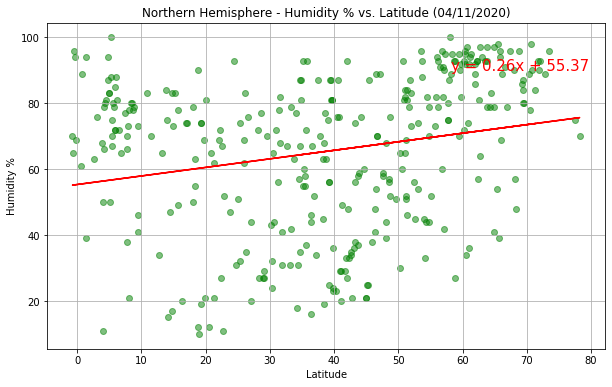

-------------------- Summary of Linear Regression --------------------
Liner equation:  y = 0.26x + 55.37
The r value is: 0.227067728483297
The r-squared value is: 0.05155975331856429
The correlation factor between Latitude and Humidity % is: 0.23
Slope value for the linear equation between Latitude and Humidity % is: 0.26
Standard Error value between Latitude and Humidity % is: 0.06
----------------------------------------------------------------------
None


<Figure size 432x288 with 0 Axes>

In [133]:
#Prep axis and labels
x_values=north_hemisphere["Latitude"]
y_values=north_hemisphere["Humidity"]
x_label="Latitude"
y_label="Humidity %"
title="Northern Hemisphere - Humidity % vs. Latitude"

#Call linear regression function to generate plot
reg_line = linear_Regression(x_values,y_values,x_label,y_label,title)
print(reg_line)

##### Analysis:
* Scatterplot with linear regression has positive correlation factor of 0.30 between Latitude and Humidity. This shows there is very week coorlation relationship between Latitude and Humidity.
* Scatterplot with linear regression has r-squared value of 0.09. This means only 9% of the variance is explained by this linear model which also shows there is almost no relation between Latitude and Humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

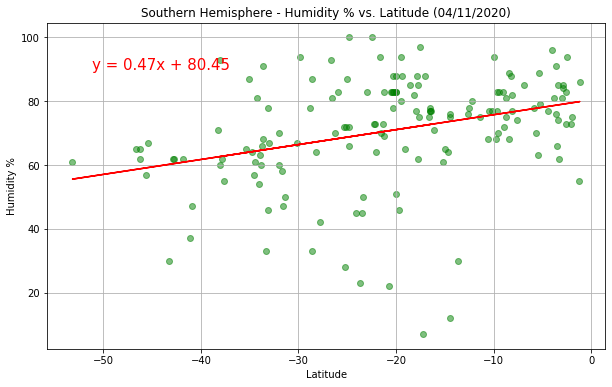

-------------------- Summary of Linear Regression --------------------
Liner equation:  y = 0.47x + 80.45
The r value is: 0.3327775343518461
The r-squared value is: 0.1107408873692941
The correlation factor between Latitude and Humidity % is: 0.33
Slope value for the linear equation between Latitude and Humidity % is: 0.47
Standard Error value between Latitude and Humidity % is: 0.11
----------------------------------------------------------------------
None


<Figure size 432x288 with 0 Axes>

In [134]:
#Prep axis and labels
x_values=south_hemisphere["Latitude"]
y_values=south_hemisphere["Humidity"]
x_label="Latitude"
y_label="Humidity %"
title="Southern Hemisphere - Humidity % vs. Latitude"

#Call linear regression function to generate plot
reg_line = linear_Regression(x_values,y_values,x_label,y_label,title)
print(reg_line)

##### Analysis:
* Scatterplot with linear regression has positive correlation factor of 0.27 between Latitude and Humidity. This shows there is very week coorlation relationship between Latitude and Humidity.
* Scatterplot with linear regression has r-squared value of 0.07. This means only 7% of the variance is explained by this linear model which also shows there is almost no relation between Latitude and Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

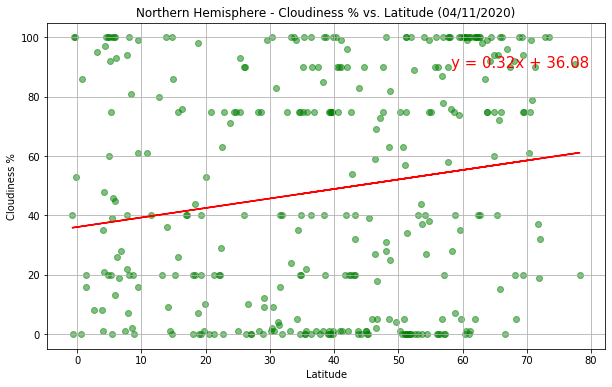

-------------------- Summary of Linear Regression --------------------
Liner equation:  y = 0.32x + 36.08
The r value is: 0.16954979785600313
The r-squared value is: 0.028747133953011525
The correlation factor between Latitude and Cloudiness % is: 0.17
Slope value for the linear equation between Latitude and Cloudiness % is: 0.32
Standard Error value between Latitude and Cloudiness % is: 0.1
----------------------------------------------------------------------
None


<Figure size 432x288 with 0 Axes>

In [135]:
#Prep axis and labels
x_values=north_hemisphere["Latitude"]
y_values=north_hemisphere["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness %"
title="Northern Hemisphere - Cloudiness % vs. Latitude"

#Call linear regression function to generate plot
reg_line = linear_Regression(x_values,y_values,x_label,y_label,title)
print(reg_line)

##### Analysis:
* Scatterplot with linear regression has positive correlation factor of 0.26.This shows there is very week coorlation relationship between Latitude and Cloudiness.
* Scatterplot with linear regression has r-squared value of 0.06. This means only 6% of the variance is explained by this linear model which also shows there is almost no relation between Latitude and Cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

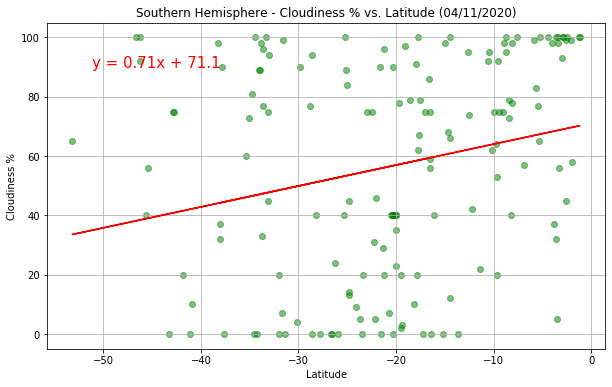

-------------------- Summary of Linear Regression --------------------
Liner equation:  y = 0.71x + 71.1
The r value is: 0.2379432514900142
The r-squared value is: 0.05661699092964014
The correlation factor between Latitude and Cloudiness % is: 0.24
Slope value for the linear equation between Latitude and Cloudiness % is: 0.71
Standard Error value between Latitude and Cloudiness % is: 0.23
----------------------------------------------------------------------
None


<Figure size 432x288 with 0 Axes>

In [136]:
#Prep axis and labels
x_values=south_hemisphere["Latitude"]
y_values=south_hemisphere["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness %"
title="Southern Hemisphere - Cloudiness % vs. Latitude"

#Call linear regression function to generate plot
reg_line = linear_Regression(x_values,y_values,x_label,y_label,title)
print(reg_line)

##### Analysis
* Scatterplot with linear regression has positive correlation factor of 0.09.This shows there is no coorlation relationship between Latitude and Cloudiness.
* Scatterplot with linear regression has r-squared value of 0.008. This means only 0% of the variance is explained by this linear model which also shows there is almost no relation between Latitude and Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

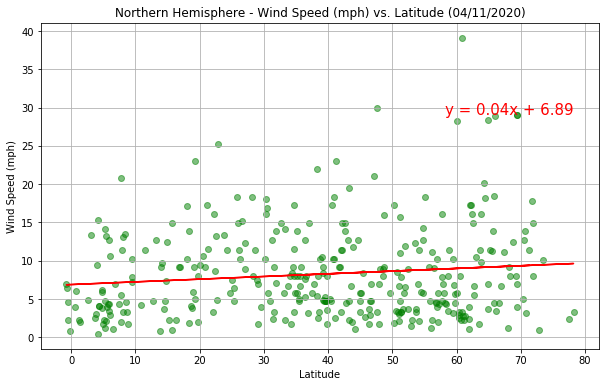

-------------------- Summary of Linear Regression --------------------
Liner equation:  y = 0.04x + 6.89
The r value is: 0.1213686003101681
The r-squared value is: 0.014730337141249338
The correlation factor between Latitude and Wind Speed (mph) is: 0.12
Slope value for the linear equation between Latitude and Wind Speed (mph) is: 0.04
Standard Error value between Latitude and Wind Speed (mph) is: 0.02
----------------------------------------------------------------------
None


<Figure size 432x288 with 0 Axes>

In [137]:
#Prep axis and labels
x_values=north_hemisphere["Latitude"]
y_values=north_hemisphere["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed (mph)"
title="Northern Hemisphere - Wind Speed (mph) vs. Latitude"

#Call linear regression function to generate plot
reg_line = linear_Regression(x_values,y_values,x_label,y_label,title)
print(reg_line)

##### Analysis:
* Scatterplot with linear regression has positive correlation factor of 0.14.This shows there is no coorlation relationship between Latitude and Wind Speed.
* Scatterplot with linear regression has r-squared value of 0.02. This means only 2% of the variance is explained by this linear model which also shows there is almost no relation between Latitude and Wind Speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

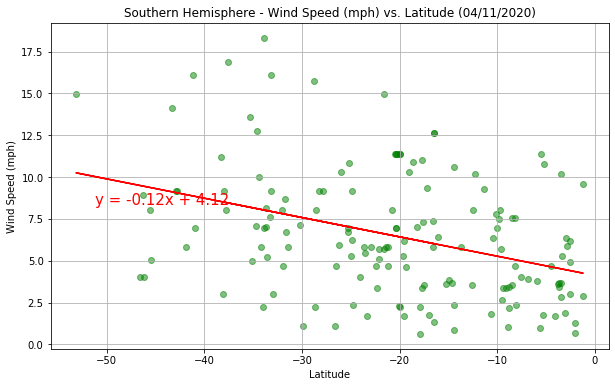

-------------------- Summary of Linear Regression --------------------
Liner equation:  y = -0.12x + 4.12
The r value is: -0.3729850083273294
The r-squared value is: 0.13911781643693796
The correlation factor between Latitude and Wind Speed (mph) is: -0.37
Slope value for the linear equation between Latitude and Wind Speed (mph) is: -0.12
Standard Error value between Latitude and Wind Speed (mph) is: 0.02
----------------------------------------------------------------------
None


<Figure size 432x288 with 0 Axes>

In [138]:
#Prep axis and labels
x_values=south_hemisphere["Latitude"]
y_values=south_hemisphere["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed (mph)"
title="Southern Hemisphere - Wind Speed (mph) vs. Latitude"

#Call linear regression function to generate plot
reg_line = linear_Regression(x_values,y_values,x_label,y_label,title)
print(reg_line)

##### Analysis:
* Scatterplot with linear regression has negative correlation factor of 0.38.This shows there is weak coorlation relationship between Latitude and Wind Speed.
* Scatterplot with linear regression has r-squared value of 0.14. This means only 14% of the variance is explained by this linear model which also suggests there is very weak relation between Latitude and Wind Speed.